In [ ]:
"""
3. Custom Resume Builder
User enters experience and skills, and AI generates a resume draft.

"""

In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, List
from pydantic import BaseModel, Field

In [3]:
load_dotenv()
llm = ChatOpenAI(model="gpt-3.5-turbo")

In [5]:
# Define the structure for resume sections
class ResumeSchema(BaseModel):
    summary: str = Field(description="Professional summary")
    experience: List[str] = Field(description="List of work experiences")
    skills: List[str] = Field(description="List of skills")
    education: str = Field(description="Education background")

structured_llm = llm.with_structured_output(ResumeSchema)

In [6]:
class ResumeBuilderState(TypedDict):
    user_experience: str
    user_skills: str
    response: ResumeSchema

In [7]:
def build_resume(state: ResumeBuilderState):
    # Extract user inputs from state
    experience = state["user_experience"]
    skills = state["user_skills"]
    
    # Create prompt
    prompt = f"""
    Create a professional resume draft based on the following information:
    
    Experience: {experience}
    Skills: {skills}
    
    Generate a complete resume with:
    1. A professional summary (3-4 sentences)
    2. Detailed work experience section (bullet points)
    3. Skills section (categorized if possible)
    4. Education section (assume standard if not provided)
    """
    
    # Get structured response from LLM
    response = structured_llm.invoke(prompt)
    
    return {"response": response}


In [10]:
# Create the workflow graph
graph = StateGraph(ResumeBuilderState)

# Add nodes
graph.add_node("resume_builder", build_resume)

# Add edges
graph.add_edge(START, "resume_builder")
graph.add_edge("resume_builder", END)

# Compile the workflow
workflow = graph.compile()

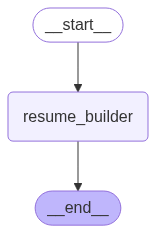

In [12]:
workflow

In [11]:
# Test the workflow
initial_state = {
    "user_experience": "3 years as Python developer at TechCo, 2 years as Data Analyst at DataInc",
    "user_skills": "Python, Pandas, SQL, Machine Learning, Data Visualization"
}

result = workflow.invoke(initial_state)
print(result["response"])

summary='Experienced Python developer and Data Analyst with a strong background in data manipulation, analysis, and visualization. Proficient in Python, Pandas, SQL, Machine Learning, and Data Visualization. Demonstrated track record of delivering effective data-driven solutions and insights in various roles. Seeking opportunities to leverage expertise in a dynamic and collaborative environment.' experience=['Python Developer at TechCo (3 years)', 'Data Analyst at DataInc (2 years)'] skills=['Python', 'Pandas', 'SQL', 'Machine Learning', 'Data Visualization'] education="Bachelor's Degree in Computer Science"
